In [1]:
# TFM - Grupo 2 - Entrega 18/05/2024

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#df_event = pd.read_csv("/content/drive/MyDrive/data/daily_calendar_with_events.csv")
df_event = pd.read_csv("data/daily_calendar_with_events.csv")
df_prices = pd.read_csv("data/item_prices.csv")
df_sales = pd.read_csv("data/item_sales.csv")

# Tratamento DF Event

In [5]:
df_event['date'] = pd.to_datetime(df_event.date)
#df_event.set_index('date', inplace=True)

In [6]:
colunas = df_event.columns
colunas

Index(['date', 'weekday', 'weekday_int', 'd', 'event'], dtype='object')

In [7]:
df_event.dtypes

date           datetime64[ns]
weekday                object
weekday_int             int64
d                      object
event                  object
dtype: object

Conversão de tipos

In [8]:
df_event["weekyear"] = df_event['date'].dt.isocalendar().week

df_event["year"] = df_event['date'].dt.year

In [9]:
def g(x):
    return  np.int16(str(x[0]) + str(x[1]))

df_event['yearweek'] = df_event[['year', 'weekyear']].apply(g, axis=1)

In [10]:
df_event['weekday_int'] = df_event['weekday_int'].astype('int8')

In [11]:
df_event['year'] = df_event['year'].astype('int16')

In [12]:
df_event['yearweek'] = df_event['yearweek'].astype('int16')

In [13]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1913 non-null   datetime64[ns]
 1   weekday      1913 non-null   object        
 2   weekday_int  1913 non-null   int8          
 3   d            1913 non-null   object        
 4   event        26 non-null     object        
 5   weekyear     1913 non-null   UInt32        
 6   year         1913 non-null   int16         
 7   yearweek     1913 non-null   int16         
dtypes: UInt32(1), datetime64[ns](1), int16(2), int8(1), object(3)
memory usage: 78.6+ KB


In [14]:
# Substituir linhas com valores NaN por 'Normalday'

df_event.fillna('Normalday', inplace=True)

In [15]:
df_event['event'].value_counts()

Normalday         1887
SuperBowl            6
Ramadan starts       5
Thanksgiving         5
NewYear              5
Easter               5
Name: event, dtype: int64

# Tratamento DF Prices

In [16]:
# item_prices.csv
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [17]:
df_prices.query("yearweek.isnull()").head()

,item,category,store_code,yearweek,sell_price
149,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
150,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
151,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
152,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15
153,ACCESORIES_1_001,ACCESORIES,NYC_1,NaN,11.15


In [18]:
colunas = df_prices.columns

In [19]:
# Adicionado zero para a semana do ano que esta null
df_prices["yearweek"].fillna(0, inplace=True)

In [20]:
df_prices['yearweek'] = df_prices['yearweek'].astype('int16')

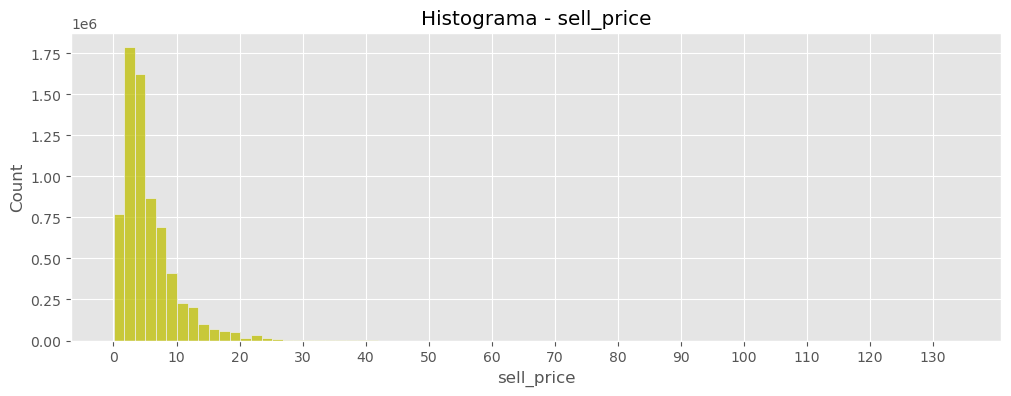

In [21]:
plt.figure(figsize=(12, 4), dpi=100)
sns.histplot(df_prices["sell_price"], bins = 80, color='y')

# Define os intervalos dos rótulos do eixo x
plt.xticks(range(0, int(df_prices["sell_price"].max()) + 1, 10))

plt.title("Histograma - sell_price")
plt.show()

# Tratamento DF Sales

In [22]:
#item_sales.csv

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


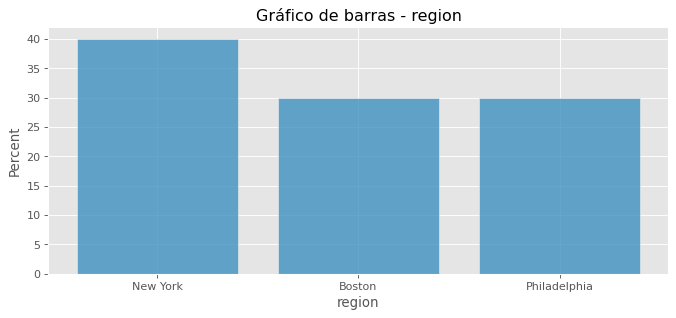

In [23]:
plt.figure(figsize=(10, 4), dpi=80)
sns.histplot(data=df_sales, x="region", shrink=.8, stat='percent')
plt.title("Gráfico de barras - region")
plt.show()

In [24]:
df_sales['region'].value_counts(normalize=True)

New York       0.40
Boston         0.30
Philadelphia   0.30
Name: region, dtype: float64

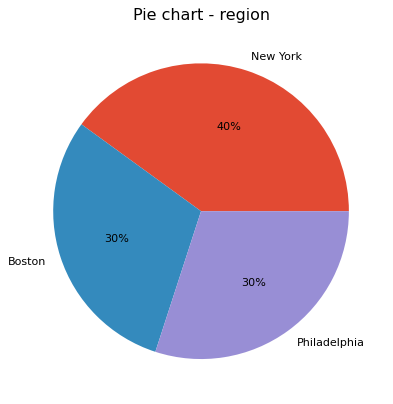

In [25]:
plt.figure(figsize=(6, 6), dpi=80, facecolor='white')
plt.pie(df_sales['region'].value_counts(normalize=True)*100, labels = df_sales['region'].value_counts(normalize=True).index, autopct='%.0f%%')
plt.title("Pie chart - region")
plt.show()

In [26]:
df_sales.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,"30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00",...,"30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00","30,490.00"
mean,1.07,1.04,0.78,0.83,0.63,0.96,0.92,1.24,1.07,0.84,...,1.37,1.59,1.69,1.25,1.23,1.16,1.15,1.33,1.61,1.63
std,5.13,5.37,3.67,4.42,3.38,4.79,5.06,6.62,5.92,4.21,...,3.74,4.10,4.36,3.28,3.13,2.88,2.95,3.36,4.09,3.81
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00
max,360.00,436.00,207.00,323.00,296.00,314.00,316.00,370.00,385.00,353.00,...,129.00,160.00,204.00,98.00,100.00,88.00,77.00,141.00,171.00,130.00


In [27]:
colunas = df_sales.columns

In [29]:
df_sales.columns

Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)

In [30]:
vendas = df_sales.iloc[:, 7:]
vendas

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,2,0,0,0,0,0,1,0,0,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,0,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,2,1,0,2,0,1,0,0,1,0
30488,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [31]:
soma_vendas = vendas.sum(axis=1)

In [32]:
df_sales["Total_de_Vendas"] = soma_vendas

In [33]:
df1 = df_sales[["id", df_sales.columns[-1]]]
df1 = df1.sort_values(by=df1.columns[-1], ascending=False)
df1.head(20)

,id,Total_de_Vendas
8412,SUPERMARKET_3_090_NYC_3,250502
18055,SUPERMARKET_3_586_BOS_2,192835
21104,SUPERMARKET_3_586_BOS_3,150122
8908,SUPERMARKET_3_586_NYC_3,134386
2314,SUPERMARKET_3_090_NYC_1,127203
29755,SUPERMARKET_3_090_PHI_3,121434
17559,SUPERMARKET_3_090_BOS_2,119496
20608,SUPERMARKET_3_090_BOS_3,114854
17721,SUPERMARKET_3_252_BOS_2,114153
15006,SUPERMARKET_3_586_BOS_1,112454


In [34]:
df_sales.head().T

,0,1,2,3,4
id,ACCESORIES_1_001_NYC_1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_003_NYC_1,ACCESORIES_1_004_NYC_1,ACCESORIES_1_005_NYC_1
item,ACCESORIES_1_001,ACCESORIES_1_002,ACCESORIES_1_003,ACCESORIES_1_004,ACCESORIES_1_005
category,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES
department,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1
store,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village
...,...,...,...,...,...
d_1910,3,0,0,1,2
d_1911,0,0,1,3,2
d_1912,1,0,1,7,2
d_1913,1,0,1,2,4


# Merge Entre DF Sales e DF Event

In [35]:
sales_melted = df_sales.melt(id_vars=['id', 'item', 'category', 'store', 'region'], var_name='d', value_name='Total_de_Vendas')

# Juntar os datasets com base na coluna 'd'
merged_df = pd.merge(sales_melted, df_event[['d', 'date', 'yearweek', 'year']], on='d')

merged_df.head()

/tmp/ipykernel_5524/849176420.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sales_melted = df_sales.melt(id_vars=['id', 'item', 'category', 'store', 'region'], var_name='d', value_name='Total_de_Vendas')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item         object        
 2   d            object        
 3   value_sales  object        
 4   date         datetime64[ns]
 5   yearweek     int16         
 6   year         int64         
dtypes: datetime64[ns](1), int16(1), int64(1), object(4)
memory usage: 3.2+ GB


In [ ]:
colunas = merged_df.columns

In [ ]:
# Agrupar os valores por região e data, fazendo a soma da coluna 'value' e mostrando todas as colunas
sales_agg = merged_df.groupby(['id', 'item']).agg({
    'value_sales': 'sum',
    #'item':'first',
    #'category':'first',
    #'department':'first',
    #'store':'first',
    #'store_code':'first',
    #'region':'first',
    'd':'first',
    'yearweek':'first',
    'year':'first'
}).reset_index()  # Resetando o índice para criar um novo DataFrame

sales_agg.head()

,id,item,value_sales,d,yearweek,year
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,260,d_1,20114,2011
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,402,d_1,20114,2011
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,385,d_1,20114,2011
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,600,d_1,20114,2011
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,542,d_1,20114,2011


In [ ]:
colunas = sales_agg.columns

In [ ]:
# Cria um novo dataframe com os dados agrupados e valore somados
colunas = list(sales_agg.drop('value_sales', axis=1).columns)
sales_goup = sales_agg.groupby(colunas)['value_sales'].sum().reset_index()

In [ ]:
sales_goup.head()

,id,item,d,yearweek,year,value_sales
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,d_1,20114,2011,260
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,d_1,20114,2011,402
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,d_1,20114,2011,385
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,20114,2011,600
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,d_1,20114,2011,542


# Merge entre DF Agrupado e DF Prices

In [ ]:
# concatena o novo dataframe agrupado com o dataframe prices para ter o valor da semana
merged_sales_group_prices = pd.merge(sales_goup, df_prices, on=['item', 'yearweek'], how='outer')

In [ ]:
merged_sales_group_prices.head()

,id,item,d,yearweek,year,value_sales,category,store_code,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,d_1,20114.0,2011.0,260,NaN,NaN,NaN
1,ACCESORIES_1_001_BOS_2,ACCESORIES_1_001,d_1,20114.0,2011.0,402,NaN,NaN,NaN
2,ACCESORIES_1_001_BOS_3,ACCESORIES_1_001,d_1,20114.0,2011.0,385,NaN,NaN,NaN
3,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,d_1,20114.0,2011.0,600,NaN,NaN,NaN
4,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,d_1,20114.0,2011.0,542,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px